In [2]:
# All the imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import seaborn as sns
sns.set_theme(style='darkgrid')

import os, random, datetime
import requests, json
import wget, zipfile


In [3]:
# Lat Lon for Dhanal Kalan Akal Academy
lat, lon = 31.262328, 75.559109
# Date strings in YYYYMMDD format
start_date = '20100101'
end_date = '20200928'
filetype = 'CSV'

# API access for NASA POWER Data via 
# https://power.larc.nasa.gov/data-access-viewer/
url = 'https://power.larc.nasa.gov/cgi-bin/v1/DataAccess.py?&request=execute&identifier=SinglePoint'

# Get all the Solar, Moisture, and Temperature related metrics that are available DAILY
url += '&parameters=PRECTOT,QV2M,RH2M,PS,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M,KT,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN'
# Start & End dates for DAILY data
url += '&startDate={}&endDate={}'.format(start_date, end_date)
# Misc
url += '&userCommunity=SSE&tempAverage=DAILY&outputList={}'.format(filetype)
# Lat & Lon
url += '&lat={}&lon={}'.format(lat,lon)


try: 
    response = requests.request("GET", url)
    response.raise_for_status()
    json_response = response.json()
    
except Exception as err:
    print('Something went wrong: {err}')


In [4]:
json_response.keys()

dict_keys(['features', 'header', 'messages', 'outputs', 'parameterInformation', 'time', 'type'])

In [5]:
csv_url = json_response['outputs']['csv']
DOWNLOAD_FOLDER = '/storage/solar/data'

csv_path = wget.download(csv_url, os.path.join(DOWNLOAD_FOLDER))


In [6]:
df_header = pd.read_csv(csv_path, nrows=22)
print(df_header.values)

[['NASA/POWER SRB/FLASHFlux/MERRA2/GEOS 5.12.4 (FP-IT) 0.5 x 0.5 Degree Daily Averaged Data ']
 ['Dates (month/day/year): 01/01/2010 through 09/28/2020 ']
 ['Location: Latitude  31.2623   Longitude 75.5591 ']
 ['Elevation from MERRA-2: Average for 1/2x1/2 degree lat/lon region = 289.24 meters   Site = na ']
 ['Climate zone: na (reference Briggs et al: http://www.energycodes.gov) ']
 ['Value for missing model data cannot be computed or out of model availability range: -999 ']
 ['Parameter(s): ']
 ['T2M_RANGE MERRA2 1/2x1/2 Temperature Range at 2 Meters (C) ']
 ['PS MERRA2 1/2x1/2 Surface Pressure (kPa) ']
 ['QV2M MERRA2 1/2x1/2 Specific Humidity at 2 Meters (g/kg) ']
 ['RH2M MERRA2 1/2x1/2 Relative Humidity at 2 Meters (%) ']
 ['ALLSKY_SFC_SW_DWN SRB/FLASHFlux 1/2x1/2 All Sky Insolation Incident on a Horizontal Surface (kW-hr/m^2/day) ']
 ['T2M_MIN MERRA2 1/2x1/2 Minimum Temperature at 2 Meters (C) ']
 ['TS MERRA2 1/2x1/2 Earth Skin Temperature (C) ']
 ['CLRSKY_SFC_SW_DWN SRB/FLASHFlux 

In [7]:
df = pd.read_csv(csv_path, skiprows=23, na_values='-999', parse_dates=[['YEAR','MO','DY']], keep_date_col=True)
df = df.rename(columns={'YEAR_MO_DY':'date'}).set_index('date')
df['day'] = df.MO + df.DY
df.head()

,LAT,LON,YEAR,MO,DY,PRECTOT,QV2M,RH2M,PS,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M,KT,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN,day
date,,,,,,,,,,,,,,,,,,,,
2010-01-01,31.26234,75.55912,2010,01,01,0.00,2.96,31.46,98.25,15.50,10.35,-3.66,-3.48,22.04,6.54,12.83,0.66,3.71,3.55,0101
2010-01-02,31.26234,75.55912,2010,01,02,0.00,2.91,28.69,98.46,13.48,10.37,-3.83,-3.63,22.00,8.52,14.03,0.35,NaN,1.87,0102
2010-01-03,31.26234,75.55912,2010,01,03,4.54,3.82,42.60,98.52,11.58,10.07,-0.44,-0.35,19.76,8.18,12.16,0.20,NaN,1.07,0103
2010-01-04,31.26234,75.55912,2010,01,04,0.06,4.63,57.35,98.36,14.26,10.16,2.42,2.44,18.84,4.58,10.53,0.45,NaN,2.44,0104
2010-01-05,31.26234,75.55912,2010,01,05,0.00,3.85,47.00,98.01,17.04,9.60,-0.17,-0.11,20.18,3.14,10.70,0.55,3.79,2.94,0105


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3924 entries, 2010-01-01 to 2020-09-28
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LAT                3924 non-null   float64
 1   LON                3924 non-null   float64
 2   YEAR               3924 non-null   object 
 3   MO                 3924 non-null   object 
 4   DY                 3924 non-null   object 
 5   PRECTOT            3922 non-null   float64
 6   QV2M               3922 non-null   float64
 7   RH2M               3922 non-null   float64
 8   PS                 3922 non-null   float64
 9   T2M_RANGE          3922 non-null   float64
 10  TS                 3922 non-null   float64
 11  T2MDEW             3922 non-null   float64
 12  T2MWET             3922 non-null   float64
 13  T2M_MAX            3922 non-null   float64
 14  T2M_MIN            3922 non-null   float64
 15  T2M                3922 non-null   float64
 16  KT    

In [9]:
df.isna().sum()

LAT                     0
LON                     0
YEAR                    0
MO                      0
DY                      0
PRECTOT                 2
QV2M                    2
RH2M                    2
PS                      2
T2M_RANGE               2
TS                      2
T2MDEW                  2
T2MWET                  2
T2M_MAX                 2
T2M_MIN                 2
T2M                     2
KT                     20
CLRSKY_SFC_SW_DWN    2088
ALLSKY_SFC_SW_DWN      18
day                     0
dtype: int64

In [10]:
df.describe()

,LAT,LON,PRECTOT,QV2M,RH2M,PS,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M,KT,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN
count,3.924000e+03,3.924000e+03,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3904.000000,1836.000000,3906.000000
mean,3.126234e+01,7.555912e+01,2.422045,9.796739,45.460069,97.467754,12.683118,24.720994,10.956392,11.016655,31.767823,19.084717,24.863491,0.564959,5.521939,4.911825
std,3.553166e-15,1.421267e-14,6.523534,5.621543,17.930292,0.702058,3.266642,9.268729,8.851138,8.856798,7.634978,7.913909,8.114213,0.136591,1.439864,1.697238
min,3.126234e+01,7.555912e+01,0.000000,1.750000,6.430000,95.780000,2.930000,5.010000,-10.020000,-9.300000,11.950000,0.160000,6.840000,0.040000,3.210000,0.210000
25%,3.126234e+01,7.555912e+01,0.000000,5.180000,32.650000,96.850000,10.420000,16.072500,3.860000,3.882500,25.520000,11.812500,17.502500,0.520000,4.150000,3.630000
50%,3.126234e+01,7.555912e+01,0.020000,7.890000,42.970000,97.510000,13.010000,26.515000,9.980000,9.960000,32.660000,20.590000,26.650000,0.620000,5.530000,5.020000
75%,3.126234e+01,7.555912e+01,1.430000,14.287500,58.940000,98.090000,14.987500,32.230000,19.037500,19.300000,37.410000,26.170000,31.357500,0.650000,6.920000,6.300000
max,3.126234e+01,7.555912e+01,103.210000,22.960000,92.820000,98.990000,22.220000,42.750000,26.810000,26.830000,48.270000,35.180000,40.460000,0.740000,8.230000,8.230000


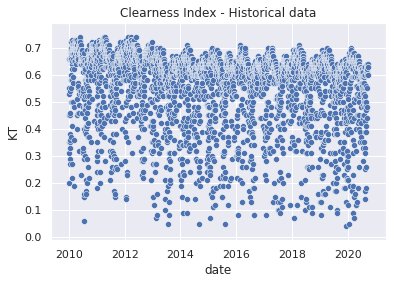

In [26]:

sns.scatterplot(x='date', y='KT', data=df)
plt.title('Clearness Index - Historical data')
plt.show()

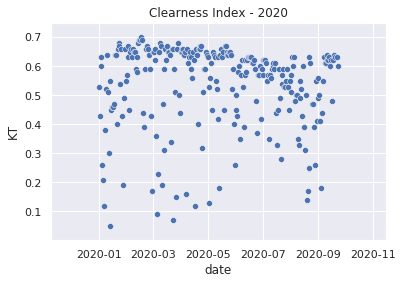

In [25]:

sns.scatterplot(x='date', y='KT', data=df.loc['2020':])
plt.title('Clearness Index - 2020')
plt.show()

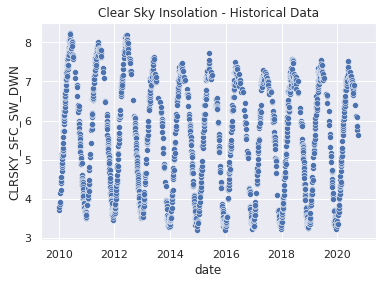

In [24]:
sns.scatterplot(x='date', y='CLRSKY_SFC_SW_DWN', data=df)
plt.title('Clear Sky Insolation - Historical Data')
plt.show()

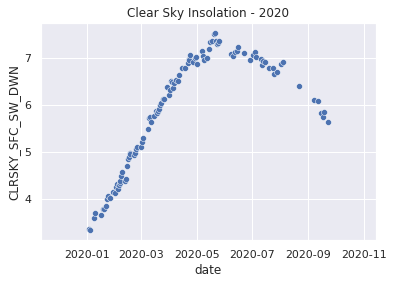

In [23]:
sns.scatterplot(x='date', y='CLRSKY_SFC_SW_DWN', data=df.loc['2020':])
plt.title('Clear Sky Insolation - 2020')
plt.show()

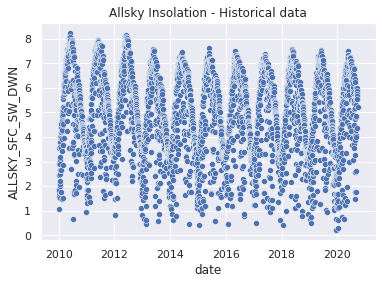

In [22]:
sns.scatterplot(x='date', y='ALLSKY_SFC_SW_DWN', data=df)
plt.title('Allsky Insolation - Historical data')
plt.show()

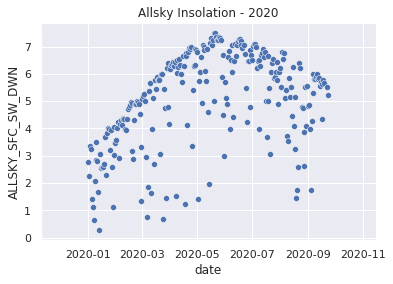

In [21]:
sns.scatterplot(x='date', y='ALLSKY_SFC_SW_DWN', data=df.loc['2020':])
plt.title('Allsky Insolation - 2020')
plt.show()